Import Libraries and Data

In [ ]:
# importing libs
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# loading local data
df = pd.read_csv("/Users/suegreen/Downloads/projects/data/3_Project/data_jobs.csv")

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Salary Distribution by Job Title

In [2]:
# filter for the job titles and country
df_DE = df[(df['job_country'] == 'Germany')].dropna(subset=['salary_year_avg'])

Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_DE['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_DE_top6 = df_DE[df_DE['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_DE_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Data Scientist',
 'Data Engineer',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Senior Data Scientist']

Plot Salary Distributions

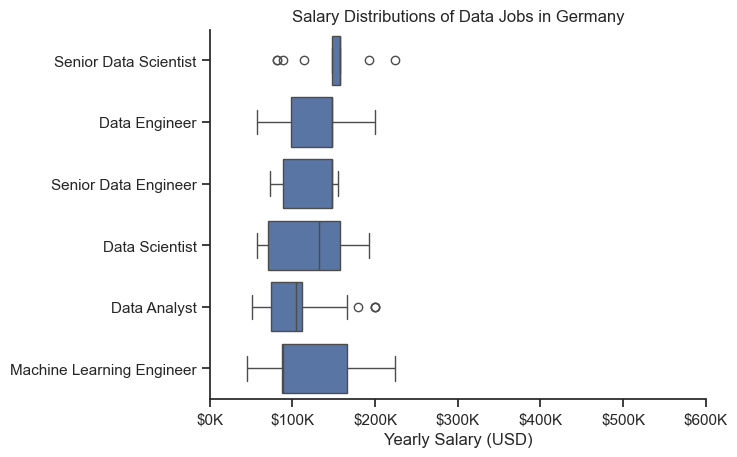

In [8]:


sns.boxplot(data=df_DE_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in Germany')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


Investigate Median Salary Vs Skill for Data Analysts

In [9]:
# Only get data analyst jobs in the US
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_DE = df_DA_DE.dropna(subset=['salary_year_avg'])

df_DA_DE = df_DA_DE.explode('job_skills')

df_DA_DE[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


Determine The Highest Paid Skills and Most Demanded Skills

In [10]:
df_DA_top_pay = df_DA_DE.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
github,3,199675.0
terraform,1,166419.5
bigquery,1,166419.5
redshift,1,166419.5
nosql,1,166419.5
kafka,1,166419.5
gcp,3,165000.0
javascript,1,111175.0
terminal,1,111175.0


In [11]:
df_DA_skills = df_DA_DE.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,18,111175.0
spark,7,111175.0
pandas,4,108412.5
excel,7,105650.0
sql,24,101500.0
tableau,13,100500.0
power bi,4,83937.5
r,7,75067.5
looker,5,53014.0


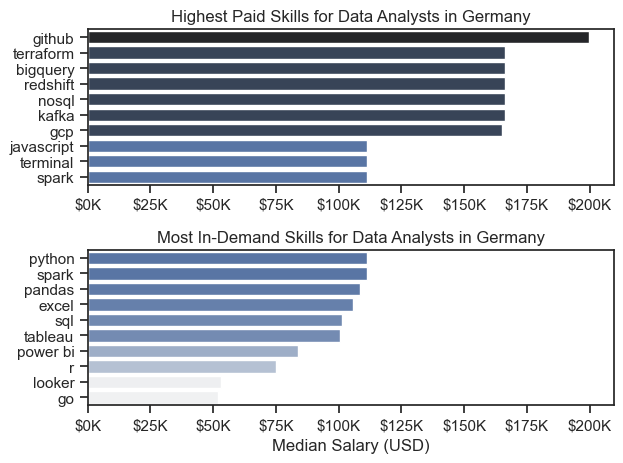

In [12]:

fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in Germany')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in Germany')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()